In [16]:
import geopandas as gpd
import pandas as pd
from shapely.geometry import Point
from matplotlib import pyplot as plt
import time
import pickle


In [7]:
# Indlæs AIS som pickle
df = pd.read_pickle('AIS september 2018.pkl') 

# Indlæs AIS som feather
# import feather
# df = feather.read_dataframe("F:/Hackathon_2018/data/raw/minute_sampled_2017/ais_combined_2017_12.feather”)

print(df.head())

                      TID           TID_ROUND  AISNUM  REPEAT     USERID  \
0 2018-09-01 00:00:02.443 2018-09-01 00:00:00       1       0  219016832   
1 2018-09-01 00:00:42.349 2018-09-01 00:01:00       1       0  219016832   
2 2018-09-01 00:01:32.739 2018-09-01 00:02:00       1       0  219016832   
3 2018-09-01 00:02:42.364 2018-09-01 00:03:00       1       0  219016832   
4 2018-09-01 00:03:33.269 2018-09-01 00:04:00       1       0  219016832   

   STATUS  ROT  SOG  POSACC   COG  THEAD  MANIND        LON        LAT  \
0       0    0    0       0  2522    251       0  11.198267  55.211800   
1       0    0    0       0  2522    251       0  11.198267  55.211800   
2       0    0    0       0   477    251       0  11.198305  55.211838   
3       0    0    0       0  2522    251       0  11.198267  55.211800   
4       0    0    0       0  2522    251       0  11.198267  55.211800   

   ROWNUMBER  STYPE                  NAVN  
0          1     60  AGERSOE III      @@@  
1         

In [14]:
# Omdan df til geopandas df
t0 = time.time()

geometry = [Point(xy) for xy in zip(df.LON, df.LAT)]
crs = {'init': 'epsg:4326'}
gdf = gpd.GeoDataFrame(df, crs=crs, geometry=geometry)

t1 = time.time()
dt = t1 - t0
print("Procestiden har været {} minutter og {} sekunder.".format(int(dt / 60), round(dt%60, 2)))


Procestiden har været 1 minutter og 19.29 sekunder.


In [17]:
# Indlæs DK-map
nuts3 = gpd.read_file('geodata/NUTS_RG_01M_2016_4326_LEVL_3.geojson')
nuts3 = nuts3[nuts3['CNTR_CODE'].isin(['DK'])]
nuts3DK = nuts3.to_crs({'init': 'epsg:4326'})

Procestiden har været 4 minutter og 40.52 sekunder.


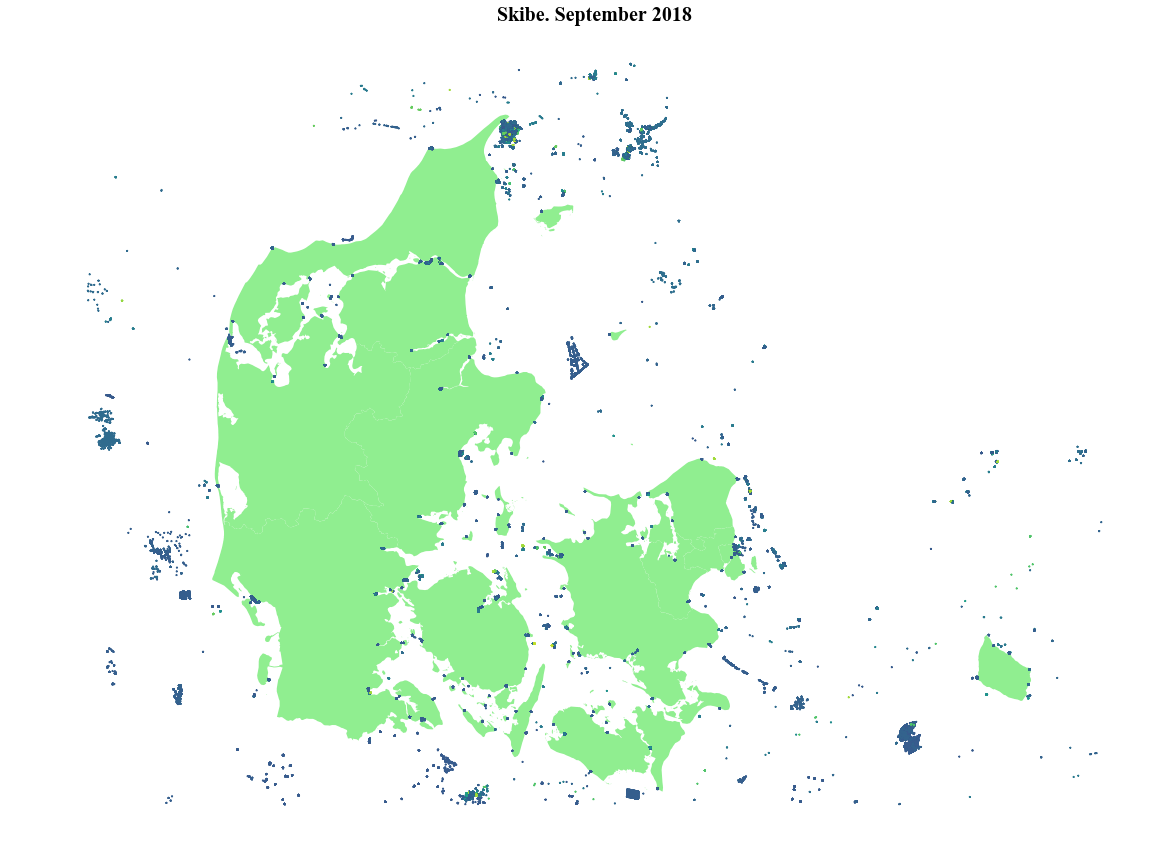

In [18]:
t0 = time.time()

fig, ax = plt.subplots(figsize=(20,15))
nuts3DK.plot(ax=ax, color='Lightgreen')

gdf.plot(ax=ax, column='USERID', markersize=2, marker='*')

ax.set_axis_off()

ax.set_title('Skibe. September 2018', loc='center',
             fontdict={'family': 'Times New Roman', 'fontsize': '20', 'fontweight': 3})


t1 = time.time()
dt = t1 - t0
print("Procestiden har været {} minutter og {} sekunder.".format(int(dt / 60), round(dt%60, 2)))
